In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-radit/train.csv
/kaggle/input/titanic-radit/test.csv
/kaggle/input/titanic-radit/gender_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.shape

(891, 12)

In [6]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
test.shape

(418, 11)

In [8]:
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [9]:
gender_submission.shape

(418, 2)

**Exploratory Data Analysis**

Pada bagian ini akan mengeksplor lebih jauh mengenai dataset titanic yang telah diberikan

In [10]:
#training set summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#training set data types
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#training set info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [19]:
gender_submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [20]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [21]:
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

**Featuring Categorical Variable Analysis**

In [22]:
gender_row = train['Sex'].value_counts()
gender_row

male      577
female    314
Name: Sex, dtype: int64

In [23]:
embarked_row = train['Embarked'].value_counts()
embarked_row

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
pclass_row = train['Pclass'].value_counts()
pclass_row

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
survived_row = train['Survived'].value_counts()
survived_row

0    549
1    342
Name: Survived, dtype: int64

In [26]:
average_survive_by_embark = train.groupby('Embarked').Survived.mean().reset_index()
average_survive_by_embark

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


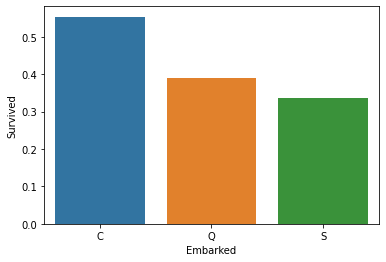

In [27]:
sns.barplot(data=average_survive_by_embark, x='Embarked', y='Survived')
plt.show()

In [28]:
sum_survive_by_embark = train.groupby('Embarked').Survived.sum().reset_index()
sum_survive_by_embark

,Embarked,Survived
0,C,93
1,Q,30
2,S,217


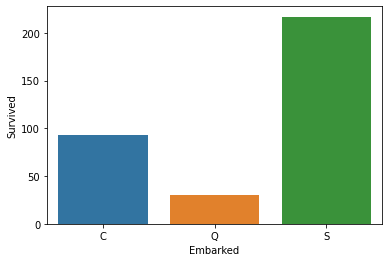

In [29]:
sns.barplot(data=sum_survive_by_embark,x='Embarked',y='Survived')
plt.show()

In [30]:
average_survive_by_pclass = train.groupby('Pclass').Survived.mean().reset_index()
average_survive_by_pclass

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


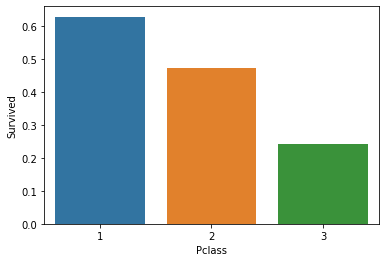

In [31]:
sns.barplot(data=average_survive_by_pclass, x='Pclass',y='Survived')
plt.show()

In [32]:
sum_survive_by_pclass = train.groupby('Pclass').Survived.sum().reset_index()
sum_survive_by_pclass

,Pclass,Survived
0,1,136
1,2,87
2,3,119


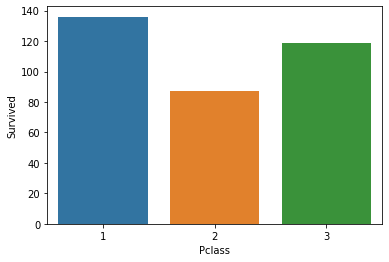

In [33]:
sns.barplot(data=sum_survive_by_pclass,x='Pclass',y='Survived')
plt.show()

In [34]:
average_survive_by_gender = train.groupby('Sex').Survived.mean().reset_index()
average_survive_by_gender

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

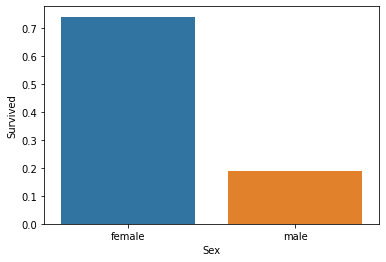

In [35]:
sns.barplot(data=average_survive_by_gender, x='Sex', y='Survived')

In [36]:
sum_survive_by_gender = train.groupby('Sex').Survived.sum().reset_index()
sum_survive_by_gender

,Sex,Survived
0,female,233
1,male,109


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

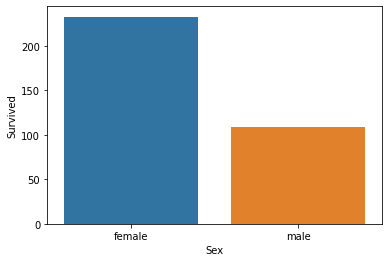

In [37]:
sns.barplot(data=sum_survive_by_gender,x='Sex',y='Survived')

Featuring Numerical Variable Analysis

In [38]:
#function ini akan melakukan deteksi terhadap baris mana di kolom mana yang termasuk outlier, apabila kurang dari q1 - 1.5 * interquartile range dan melebihi q3 - 1.5 * interquartile range
def no_outliers(data, n, features):
  outlier_indices = []
  for col in features:
    Q1 = np.percentile(data[col],25)
    Q3 = np.percentile(data[col],75)
    IQR = Q3 - Q1
    outlier_step = 1.5*IQR
    outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
  return multiple_outliers

dropped_outliers = no_outliers(train,2,['Age','SibSp','Parch','Fare'])
print("kita akan mendrop {} index".format(len(dropped_outliers)), dropped_outliers)

kita akan mendrop 10 index [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [39]:
#outliers pada variabel tipe numerical
train.loc[dropped_outliers, : ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [40]:
#drop outliers yang ada
print('Before : '+str(len(train))+' rows')
train = train.drop(dropped_outliers, axis = 0).reset_index(drop=True)
print('After : '+str(len(train))+' rows')

Before : 891 rows
After : 881 rows


In [41]:
#Rata rata survived berdasarkan SibSp
average_survived_sibsp = train.groupby('SibSp').Survived.mean().reset_index()
average_survived_sibsp

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.153846
4,4,0.166667
5,5,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

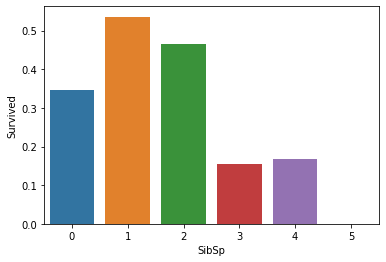

In [42]:
sns.barplot(data=average_survived_sibsp,x='SibSp',y='Survived')

In [43]:
sum_survived_sibsp = train.groupby('SibSp').Survived.sum().reset_index()
sum_survived_sibsp

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,2
4,4,3
5,5,0


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

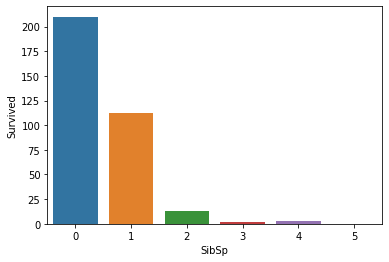

In [44]:
sns.barplot(data=sum_survived_sibsp,x='SibSp',y='Survived')

In [45]:
average_survived_parch = train.groupby('Parch').Survived.mean().reset_index()
average_survived_parch

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.542857
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

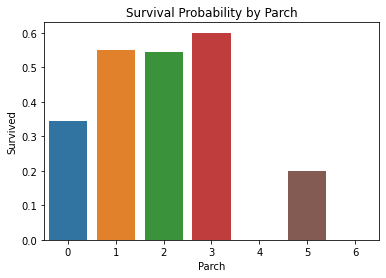

In [46]:
sns.barplot(data=average_survived_parch,x='Parch',y='Survived')
plt.title('Survival Probability by Parch')

In [47]:
sum_survived_parch = train.groupby('Parch').Survived.sum().reset_index()
sum_survived_parch

,Parch,Survived
0,0,233
1,1,65
2,2,38
3,3,3
4,4,0
5,5,1
6,6,0


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

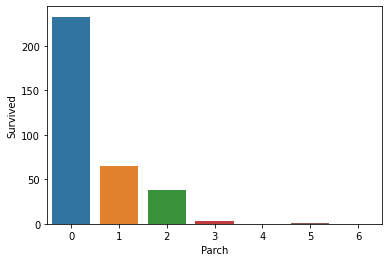

In [48]:
sns.barplot(data=sum_survived_parch,x='Parch',y='Survived')

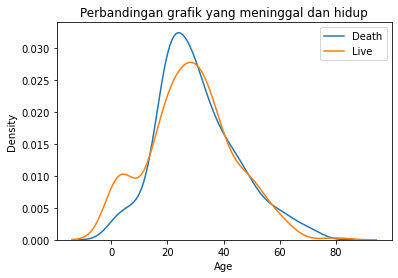

In [49]:
sns.kdeplot(train[train['Survived']==0]['Age'],label='Death')
sns.kdeplot(train[train['Survived']==1]['Age'],label='Live')
plt.title('Perbandingan grafik yang meninggal dan hidup')
plt.legend()

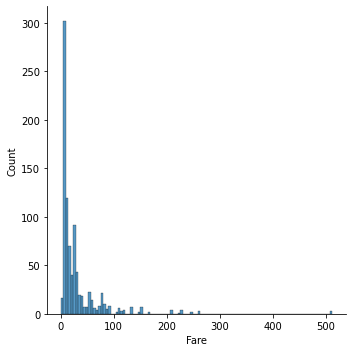

In [50]:
sns.displot(train['Fare'])

Based on the graph above, there is a skewness to the left because most customers take class 3 cruises which are relatively cheap. There are also Outliers because there are some customers who take a class 1 cruise which is relatively more expensive

**Data Preprocessing**

In [51]:
#idk but there's no ticket and cabin columns, so we will proceed with the data preprocessing
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
#idk but there's no ticket and cabin columns, so we will proceed with the data preprocessing
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [53]:
#checking missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [54]:
#finding the embark categories which appears most often
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [55]:
#filling the embarked values with mode from the column itself
train['Embarked'].fillna(mode, inplace=True)

In [56]:
#checking the missing values for each columns in training set
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         0
dtype: int64

In [57]:
#checking the missing values for each columns in testing set
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
#find the fare median
filled = test['Fare'].dropna().median()
filled

14.4542

In [59]:
#filling the Fare missing values
test['Fare'].fillna(filled,inplace=True)

In [60]:
#check the missing values in test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [61]:
melt = pd.concat([train,test])
melt.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [62]:
#checking missing values
melt.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

Kolom Survived yang kosong dapat diabaikan karena datangnya dari testing set

In [63]:
#Convert gender Categorical Variable into Numerical Variable
melt['Sex'] = melt['Sex'].map({'male' : 0, 'female' : 1})

In [64]:
#checking missing values in age column
melt['Age'].isnull().sum()

256

In [65]:
#buat list untuk looping
listed = list(melt[melt['Age'].isnull()].index)
len(listed)

256

In [66]:
for i in listed:
    median_age = melt['Age'].median()
    predict_age = melt['Age'][(melt['SibSp'] == melt.iloc[i]['SibSp']) 
                                 & (melt['Parch'] == melt.iloc[i]['Parch'])
                                 & (melt['Pclass'] == melt.iloc[i]["Pclass"])].median()
    if np.isnan(predict_age):
        melt['Age'].iloc[i] = median_age
    else:
        melt['Age'].iloc[i] = predict_age

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Looping melalui list missing age yang ada untuk menentukan baris mana dari kolom SibSp, Parch, dan Pclass yang memiliki nilai yang sama
, kemudian mengisinya dengan median dari baris tersebut. Jika baris tidak ditemukan, maka akan diisi dengan median dari keseluruhan kolom age

In [67]:
#menggunakan random karena baris pada kolom age sebelumnya masih ada yang kosong
import random
melt.Age.fillna(random.randint(25,60), inplace=True)

In [68]:
#sudah tidak ada baris pada kolom age yang kosong
melt.Age.isnull().sum()

0

**Data Transformations**

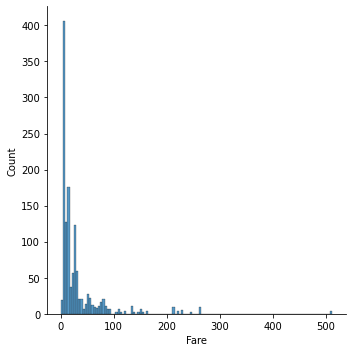

In [69]:
sns.displot(melt['Fare'])

Disini masih terjadi skewness, selanjutnya kita akan menggunakan log transformation untuk menghilangkan skewness

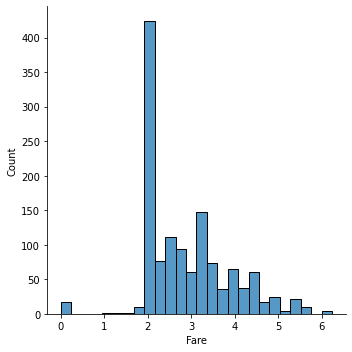

In [70]:
#Menghilangkan skewness dengan log transformation
melt['Fare'] = melt['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
sns.displot(melt['Fare'])

**Creating New Columns From Other Columns**

In [71]:
#Mencari panggilan dari nama
melt['Title'] = [name.split(',')[1].split('.')[0].strip() for name in melt['Name']]
melt[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [72]:
#jumlah masing masing panggilan
melt['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [73]:
#mengganti beberapa panggilan agar lebih simpel
melt['Title'] = melt['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Unique')
melt['Title'] = melt['Title'].replace(['Mlle', 'Ms'], 'Miss')
melt['Title'] = melt['Title'].replace('Mme', 'Mrs')

In [74]:
#jumlah masing masing panggilan
melt['Title'].value_counts()

Mr        753
Miss      259
Mrs       198
Master     60
Unique     29
Name: Title, dtype: int64

In [75]:
#rata rata kemungkinan hidup berdasarkan title
average_survive_by_title = melt.groupby('Title').Survived.mean().reset_index()
average_survive_by_title

,Title,Survived
0,Master,0.589744
1,Miss,0.711111
2,Mr,0.157895
3,Mrs,0.793651
4,Unique,0.347826


<AxesSubplot:xlabel='Title', ylabel='Survived'>

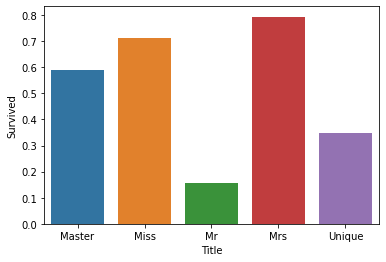

In [76]:
sns.barplot(data=average_survive_by_title, x='Title',y='Survived')

In [77]:
#drop kolom nama
melt = melt.drop('Name',axis = 1)

In [78]:
melt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,Mrs
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,Mrs
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,Mr


**Hitung FamilyCount dan Alone**

In [79]:
melt['FamilyCount'] = melt['SibSp'] + melt['Parch'] + 1

SibSp adalah saudara maupun pasangan, Parch adalah orang tua dan anak, 1 termasuk diri kita

In [80]:
melt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyCount
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr,2
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,Mrs,2
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,Mr,1


In [81]:
#rata rata survived pada family count
average_survived_family = melt.groupby('FamilyCount').Survived.mean().reset_index
average_survived_family

<bound method Series.reset_index of FamilyCount
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.052632
7     0.333333
8     0.000000
11         NaN
Name: Survived, dtype: float64>

In [82]:
#create Alone Feature
melt['Alone'] = 0
melt.loc[melt['FamilyCount'] == 1, 'Alone'] = 1

In [83]:
melt.groupby('Alone').Survived.mean().reset_index()

,Alone,Survived
0,0,0.514535
1,1,0.303538


In [84]:
#drop SibSp, Parch, dan FamilyCount
melt = melt.drop(['SibSp', 'Parch', 'FamilyCount'], axis = 1)
melt.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,0,22.0,A/5 21171,1.981001,NaN,S,Mr,0
1,2,1.0,1,1,38.0,PC 17599,4.266662,C85,C,Mrs,0
2,3,1.0,3,1,26.0,STON/O2. 3101282,2.070022,NaN,S,Miss,1
3,4,1.0,1,1,35.0,113803,3.972177,C123,S,Mrs,0
4,5,0.0,3,0,35.0,373450,2.085672,NaN,S,Mr,1


**Changing Age into Ordinal Variable**

In [85]:
#membuat kolom AgeBand dan hitung rata rata survivednya
melt['AgeBand'] = pd.cut(melt['Age'], 5)
melt.groupby('AgeBand').Survived.mean().reset_index()

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.340164
2,"(32.102, 48.068]",0.408654
3,"(48.068, 64.034]",0.461538
4,"(64.034, 80.0]",0.090909


In [86]:
#Assign ordinal ke setiap AgeBand
melt.loc[melt['Age'] <= 16.136, 'Age'] = 0
melt.loc[(melt['Age'] > 16.136) & (melt['Age'] <= 32.102), 'Age'] = 1
melt.loc[(melt['Age'] > 32.102) & (melt['Age'] <= 48.068), 'Age'] = 2
melt.loc[(melt['Age'] > 48.068) & (melt['Age'] <= 64.034), 'Age'] = 3
melt.loc[melt['Age'] > 64.034 , 'Age'] = 4

In [87]:
#drop AgeBand
melt = melt.drop('AgeBand', axis = 1)

In [88]:
#Cek Age Datatype
melt['Age'].dtypes

dtype('float64')

In [89]:
#mengganti tipe data Age menjadi integer
melt['Age'] = melt['Age'].astype('int')
melt['Age'].dtype

dtype('int64')

**Label Encoding**

In [90]:
melt.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,3,0,1,A/5 21171,1.981001,NaN,S,Mr,0
1,2,1.0,1,1,2,PC 17599,4.266662,C85,C,Mrs,0
2,3,1.0,3,1,1,STON/O2. 3101282,2.070022,NaN,S,Miss,1
3,4,1.0,1,1,2,113803,3.972177,C123,S,Mrs,0
4,5,0.0,3,0,2,373450,2.085672,NaN,S,Mr,1


In [91]:
#encode kolom Title dan Embarked
melt = pd.get_dummies(melt, columns = ['Title'])
melt = pd.get_dummies(melt, columns = ['Embarked'], prefix = 'Em')
melt.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,A/5 21171,1.981001,NaN,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,PC 17599,4.266662,C85,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,STON/O2. 3101282,2.070022,NaN,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,113803,3.972177,C123,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,373450,2.085672,NaN,1,0,0,1,0,0,0,0,1


In [92]:
#create FareBand untuk memperbaiki data pada Kolom Fare dan rata rata survivednya
melt['FareBand'] = pd.cut(melt['Fare'], 4)
melt.groupby('FareBand').Survived.mean().reset_index()

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [93]:
# Assign ordinal ke tiap FareBand

melt.loc[melt['Fare'] <= 1.56, 'Fare'] = 0
melt.loc[(melt['Fare'] > 1.56) & (melt['Fare'] <= 3.119), 'Fare'] = 1
melt.loc[(melt['Fare'] > 3.119) & (melt['Fare'] <= 4.679), 'Fare'] = 2
melt.loc[melt['Fare'] > 4.679, 'Fare'] = 3

In [94]:
#ganti tipe data Fare menjadi integer
melt['Fare'] = melt['Fare'].astype('int')

In [95]:
#drop FareBand
melt = melt.drop(['FareBand','Ticket','Cabin'], axis = 1)

In [96]:
melt.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,0,0,1,0,0,0,0,1


In [97]:
#pisahkan dataset train dan test yang sebelumnya tergabung
train = melt[:len(train)]
test = melt[len(train):]

In [98]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,0,0,1,0,0,0,0,1


In [99]:
#drop passengerId dari train
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,0,0,1,0,0,0,0,1


In [100]:
#ubah Survived pada train set menjadi Interger
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,0,0,1,0,0,0,0,1


In [101]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,Em_C,Em_Q,Em_S
0,892,NaN,3,0,2,1,1,0,0,1,0,0,0,1,0
1,893,NaN,3,1,2,1,0,0,0,0,1,0,0,0,1
2,894,NaN,2,0,3,1,1,0,0,1,0,0,0,1,0
3,895,NaN,3,0,1,1,1,0,0,1,0,0,0,0,1
4,896,NaN,3,1,1,1,0,0,0,0,1,0,0,0,1


In [102]:
test = test.drop('Survived',axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,Em_C,Em_Q,Em_S
0,892,3,0,2,1,1,0,0,1,0,0,0,1,0
1,893,3,1,2,1,0,0,0,0,1,0,0,0,1
2,894,2,0,3,1,1,0,0,1,0,0,0,1,0
3,895,3,0,1,1,1,0,0,1,0,0,0,0,1
4,896,3,1,1,1,0,0,0,0,1,0,0,0,1


**Modelling**

In [103]:
#import model library
#Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#Model evaluation
from sklearn.model_selection import cross_val_score

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

**Split Data**

In [104]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 13)
Y_train shape:  (881,)
X_test shape:  (418, 13)


Logistic Regression

In [105]:
regression = LogisticRegression()
regression.fit(X_train, Y_train)
Y_pred = regression.predict(X_test)
acc_log = round(regression.score(X_train, Y_train) * 100, 2)
acc_log

80.93

Support Vector Machine

In [106]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.43

K-Nearest Neighbor(KNN)

In [107]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.75

Gaussian Naive Bayes

In [108]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.89

Perceptron

In [109]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

65.27

Linear SVC

In [110]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.27

Stochastic gradient descent

In [111]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.55

Decision Tree

In [112]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.81

Random Forest

In [113]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.81

CatBoost

In [114]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6869436	total: 52ms	remaining: 51.9s
1:	learn: 0.6803977	total: 53.1ms	remaining: 26.5s
2:	learn: 0.6747415	total: 54.2ms	remaining: 18s
3:	learn: 0.6675640	total: 55.2ms	remaining: 13.7s
4:	learn: 0.6616760	total: 56.3ms	remaining: 11.2s
5:	learn: 0.6570414	total: 57ms	remaining: 9.45s
6:	learn: 0.6534539	total: 57.6ms	remaining: 8.18s
7:	learn: 0.6501201	total: 58.2ms	remaining: 7.21s
8:	learn: 0.6446669	total: 59ms	remaining: 6.49s
9:	learn: 0.6398980	total: 60ms	remaining: 5.94s
10:	learn: 0.6338808	total: 61ms	remaining: 5.48s
11:	learn: 0.6288505	total: 61.8ms	remaining: 5.09s
12:	learn: 0.6235859	total: 63ms	remaining: 4.78s
13:	learn: 0.6184429	total: 64ms	remaining: 4.5s
14:	learn: 0.6134906	total: 64.8ms	remaining: 4.25s
15:	learn: 0.6088446	total: 65.8ms	remaining: 4.05s
16:	learn: 0.6035034	total: 66.9ms	remaining: 3.87s
17:	learn: 0.5985063	total: 68ms	remaining: 3.71s
18:	learn: 0.5934883	total: 68.9ms	remaining: 3.56s
19:	learn: 0

In [115]:
acc_catboost

85.81

**Evaluasi Model dan Hyperparameter Tuning**

Training Accuracy

In [116]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.81
1,Decision Tree,85.81
2,CatBoost,85.81
3,Support Vector Machines,83.43
4,KNN,82.75
5,Linear SVC,81.27
6,Logistic Regression,80.93
7,Naive Bayes,78.89
8,Stochastic Gradient Decent,78.55
9,Perceptron,65.27


K-Fold Cross Validation

In [117]:
#Buat list untuk memasukkan hasil model machine learning sebelumnya
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [118]:
#buat list untuk mengaplikasikan cross validation ketiap classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870881	total: 800us	remaining: 799ms
1:	learn: 0.6807601	total: 1.68ms	remaining: 837ms
2:	learn: 0.6744225	total: 2.49ms	remaining: 826ms
3:	learn: 0.6694537	total: 3.1ms	remaining: 771ms
4:	learn: 0.6642118	total: 3.83ms	remaining: 763ms
5:	learn: 0.6608587	total: 4.31ms	remaining: 713ms
6:	learn: 0.6547056	total: 5.01ms	remaining: 711ms
7:	learn: 0.6491249	total: 5.74ms	remaining: 712ms
8:	learn: 0.6429342	total: 6.53ms	remaining: 720ms
9:	learn: 0.6374453	total: 7.24ms	remaining: 717ms
10:	learn: 0.6332652	total: 7.86ms	remaining: 707ms
11:	learn: 0.6294527	total: 8.36ms	remaining: 689ms
12:	learn: 0.6256642	total: 8.83ms	remaining: 670ms
13:	learn: 0.6203727	total: 9.62ms	remaining: 678ms
14:	learn: 0.6150146	total: 10.6ms	remaining: 695ms
15:	learn: 0.6104279	total: 11.5ms	remaining: 710ms
16:	learn: 0.6054583	total: 12.5ms	remaining: 724ms
17:	learn: 0.6007402	total: 13.5ms	remaining: 735ms
18:	learn: 0.5958627	total: 14.4ms	remaining: 

In [119]:
#create list untuk mean dan standar deviasi tiap classifier
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [120]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.824055,0.034597,Support Vector Machines
1,0.819586,0.038122,KNN
2,0.817275,0.033742,CatBoost
3,0.810457,0.025311,Logistic Regression
4,0.800243,0.035545,Linear SVC
5,0.795723,0.026071,Random Forest
6,0.793437,0.024593,Decision Tree
7,0.784346,0.043657,Gausian Naive Bayes
8,0.775281,0.038463,Stochastic Gradient Descent
9,0.729852,0.081276,Perceptron


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cross Validation Scores')

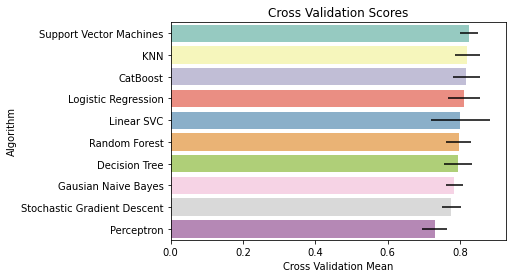

In [121]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

Seperti yang dapat dilihat pada plotting diatas, Support Vector Machine memiliki skor yang paling tinggi

Hyperparameter Tuning for SVM

In [122]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.808, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.824, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.818, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.830, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.819, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.801, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.689, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.705, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.631, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [123]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [124]:
svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [125]:
cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297369765066394

In [126]:
# Prediksi Survived dengan Support Vector Machine

Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [127]:
finish = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
finish.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [128]:
finish.to_csv("finishedtitanic.csv", index = False)